In [1]:
import pandas as pd
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt
import collections

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error

from xgboost import XGBRegressor


from sklearn.model_selection import  train_test_split

import pickle

import gzip

In [2]:
import os
os.chdir('../')
# importlib.reload(functions.model_wrapper)
from functions.model_wrapper import Tree_Model, xgboost_params

In [3]:
with gzip.open('data/gzipX_train_transformed.pckl', 'rb') as f:
    X_train_transformed = pickle.load(f)
with gzip.open('data/gzipX_val_transformed.pckl', 'rb') as f:
    X_val_transformed = pickle.load(f)  
with gzip.open('data/gzipX_holdout_transformed.pckl', 'rb') as f:
    X_holdout_transformed = pickle.load(f)  


with gzip.open('data/gzipy_train.pckl', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open('data/gzipy_val.pckl', 'rb') as f:
    y_val = pickle.load(f)
with gzip.open('data/gzipy_holdout.pckl', 'rb') as f:
    y_holdout = pickle.load(f)

In [4]:
X_train_transformed.shape, X_val_transformed.shape, X_holdout_transformed.shape

((90389, 3126), (10044, 3126), (11160, 3126))

In [5]:
xgboost_params['eval_set'] = [(X_val_transformed, y_val)]

In [6]:
xgboost_params['learning_rate'] = xgboost_params['learning_rate']/20
xgboost_params["n_jobs"] = 4
xgboost_params['learning_rate']

0.000125

[20:38:33] ======== Monitor (0): HostSketchContainer ========
[20:38:33] AllReduce: 0.017342s, 1 calls @ 17342us

[20:38:33] MakeCuts: 0.020544s, 1 calls @ 20544us

[20:38:34] DEBUG: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:130: Using tree method: 0
[0]	validation_0-rmse:40.79388


/Users/willtong/Library/Caches/pypoetry/virtualenvs/wine-libraries-PLl6gzSz-py3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:40.69669
[200]	validation_0-rmse:40.58786
[300]	validation_0-rmse:40.48268
[400]	validation_0-rmse:40.37904
[500]	validation_0-rmse:40.28496
[600]	validation_0-rmse:40.19533
[700]	validation_0-rmse:40.09202
[800]	validation_0-rmse:39.99189
[900]	validation_0-rmse:39.89319
[1000]	validation_0-rmse:39.79380
[1100]	validation_0-rmse:39.70519
[1200]	validation_0-rmse:39.60056
[1300]	validation_0-rmse:39.50969
[1400]	validation_0-rmse:39.41437
[1500]	validation_0-rmse:39.32623
[1600]	validation_0-rmse:39.23815
[1700]	validation_0-rmse:39.15634
[1800]	validation_0-rmse:39.07024
[1900]	validation_0-rmse:38.98472
[2000]	validation_0-rmse:38.89907
[2100]	validation_0-rmse:38.82026
[2200]	validation_0-rmse:38.73512
[2300]	validation_0-rmse:38.65414
[2400]	validation_0-rmse:38.57500
[2500]	validation_0-rmse:38.48272
[2600]	validation_0-rmse:38.40925
[2700]	validation_0-rmse:38.32739
[2800]	validation_0-rmse:38.25096
[2900]	validation_0-rmse:38.16609
[3000]	validation_0-rms

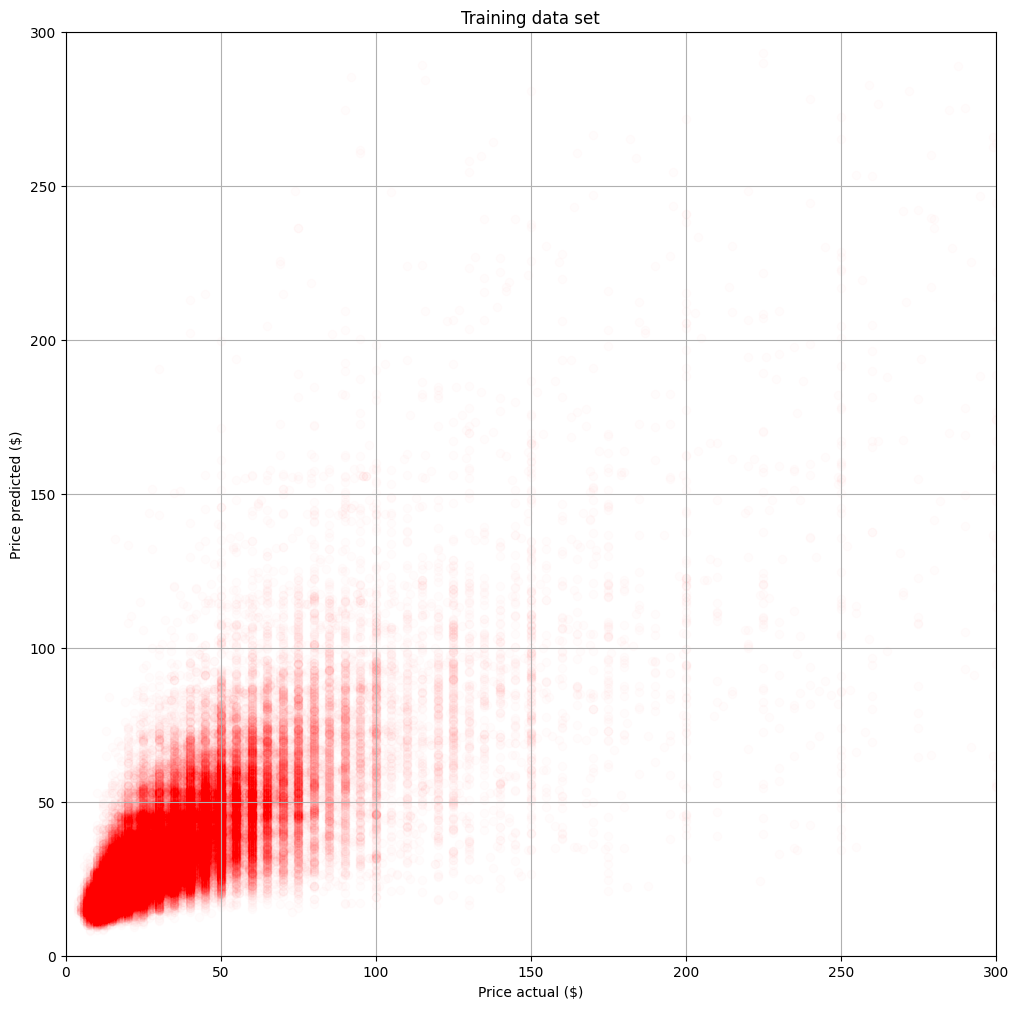

0.000125

In [7]:
gbm = Tree_Model(Model = XGBRegressor,
                 params = xgboost_params
                 )
gbm.fit(X_train_transformed, y_train)
xgboost_params['learning_rate']

In [9]:
with open('data/gbm_model_lr-1p25-4.pckl', 'wb') as f:
    pickle.dump(gbm, f)

In [10]:
feature_importances = gbm.feature_imp
with open('data/feature_importances_gbm_1p25-4.pckl', 'wb') as f:
    pickle.dump(feature_importances, f)

MdAPE is 28.207864761352543%
R2: 0.396, RMSE: 39.955, MAE: 12.400
Plotting scatter plot..


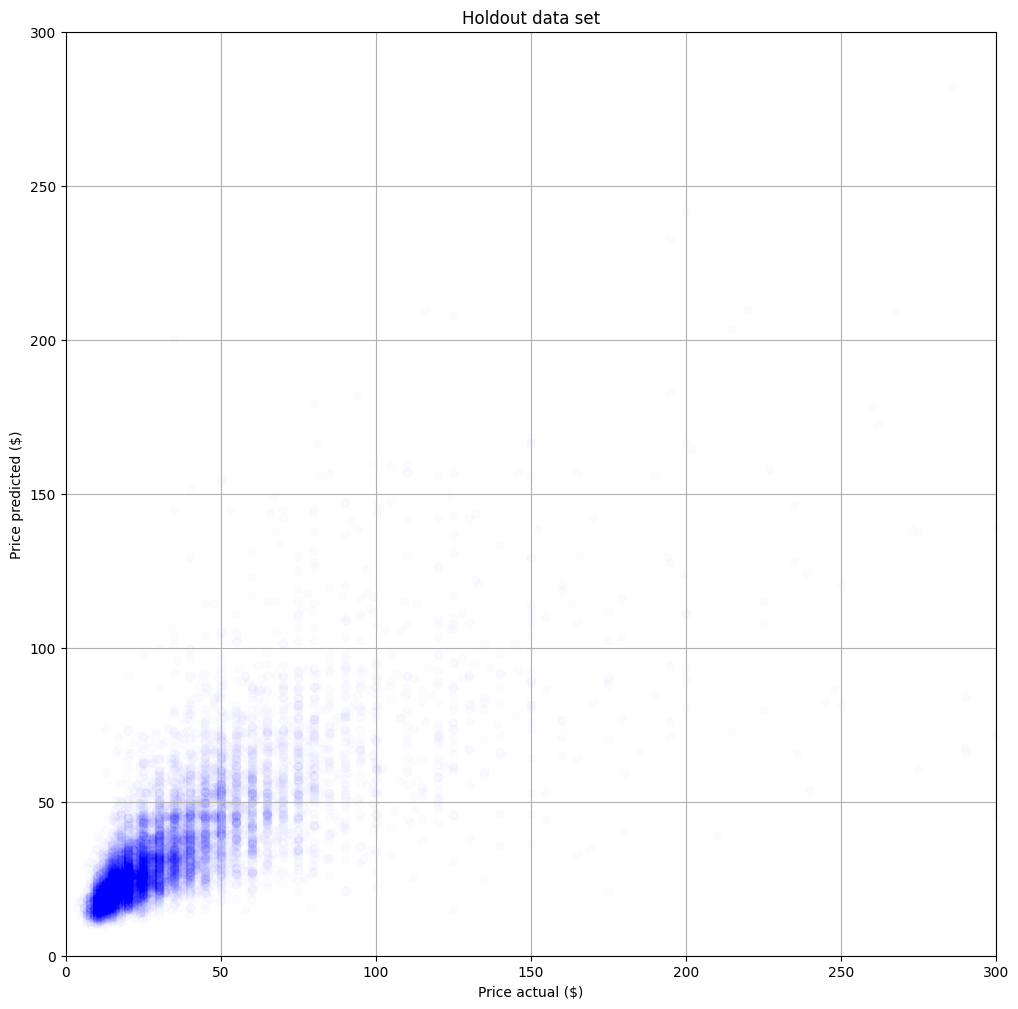

In [11]:
y_pred = gbm.predict(X_holdout_transformed, y_holdout)

In [3]:
with open('data/feature_importances_gbm_1p25-4.pckl', 'rb') as f:
    feature_importances = pickle.load(f)

In [12]:
feature_importances

[('province_Burgundy', 0.01578008),
 ('merged_Napa', 0.014608378),
 ('norm-points', 0.013495313),
 ('winery_Robert Weil', 0.011001351),
 ('country_France', 0.010557891),
 ('merged_Champagne', 0.010478661),
 ('winery_Joullian', 0.0102545535),
 ('taster-name_Roger Voss', 0.010012478),
 ('title_haut', 0.009548788),
 ('title_cheval', 0.009446915),
 ('region-1_Chevalier-Montrachet', 0.009437747),
 ('region-1_Brunello di Montalcino', 0.009329336),
 ('merged_Nebbiolo', 0.008963277),
 ('title_robert', 0.008586208),
 ('region-1_Bâtard-Montrachet', 0.0076934965),
 ('title_château&haut', 0.007522514),
 ('region-1_Margaux', 0.007278282),
 ('merged_Piedmont', 0.0072341664),
 ('title_pessac', 0.006907667),
 ('province_Tuscany', 0.006829867),
 ('province_Rheingau', 0.006634428),
 ('title_pessac&léognan', 0.0064437916),
 ('title_léognan', 0.0064056865),
 ('merged_Australia', 0.0061494675),
 ('merged_Noir', 0.006119339),
 ('merged_Barolo', 0.006057693),
 ('region-1_Vouvray', 0.006045673),
 ('winery_Pen